In [1]:
# Cell 1: Re-download and save properly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download fresh
data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Check it
print(data.columns.tolist())
print(data.head())

[*********************100%***********************]  1 of 1 completed

[('Close', 'RELIANCE.NS'), ('High', 'RELIANCE.NS'), ('Low', 'RELIANCE.NS'), ('Open', 'RELIANCE.NS'), ('Volume', 'RELIANCE.NS')]
Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2019-02-01  555.832581  558.078259  545.649373  548.739927    20187323
2019-02-04  574.042419  576.732769  552.319609  554.520761    25528059
2019-02-05  574.331360  580.045592  568.572720  574.531492    20479210
2019-02-06  582.646973  585.937658  575.532056  576.421398    20586783
2019-02-07  573.820068  587.516297  571.907923  582.646999    20150710


In [2]:
# Cell 2: Save cleanly this time
data.to_csv('../data/stock_data_clean.csv')
print("Saved cleanly!")
print(f"Shape: {data.shape}")

Saved cleanly!
Shape: (1233, 5)


In [3]:
# Cell 3: Load clean data
import pandas as pd
data = pd.read_csv('../data/stock_data_clean.csv', index_col='Date', parse_dates=True)
print("Loaded successfully!")
print(data.head())

ValueError: 'Date' is not in list

In [ ]:
# Reload data properly
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download fresh
data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Flatten multi-level columns (new yfinance issue)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Verify
print(data.columns.tolist())
print(data.shape)
print(data.head())

In [ ]:
data['MA_10'] = data['Close'].rolling(10).mean() 
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
print(data[['Close', 'MA_10', 'MA_20', 'MA_50']].head(60))

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close', linewidth=2)
plt.plot(data.index, data['MA_10'], label='MA_10')
plt.plot(data.index, data['MA_20'], label='MA_20')
plt.plot(data.index, data['MA_50'], label='MA_50')
plt.legend()
plt.title('Reliance Stock Price with Moving Averages')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Create simple test data
test = pd.Series([100, 105, 102, 108, 103])

print("Original prices:")
print(test.values)

print("\nAfter .diff():")
print(test.diff().values)

In [ ]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])
print(data['RSI'].tail(10))

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['RSI'], color='darkblue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Reliance RSI (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Count overbought periods
overbought = data[data['RSI'] > 70]
oversold = data[data['RSI'] < 30]

print(f"Times RSI above 70 (overbought): {len(overbought)} days")
print(f"Times RSI below 30 (oversold): {len(oversold)} days")

In [ ]:
start_price = data['Close'].iloc[0]
end_price = data['Close'].iloc[-1]
returns = ((end_price - start_price) / start_price) * 100

print(f"Price in Feb 2019: ₹{start_price:.2f}")
print(f"Price in Feb 2024: ₹{end_price:.2f}")
print(f"Total return: {returns:.2f}%")

In [ ]:
test = pd.Series([100, 105, 102, 110])
print("Prices:")
print(test.values)

print("\nPercentage changes:")
print(test.pct_change().values)

print("\nAs percentages:")
print((test.pct_change() * 100).values)
# so basically pct_change() is pct_change = (current_price - previous_price) / previous_price, its basically .diff() but with percentage

In [ ]:
# Calculate returns (if not already done)
data['Returns'] = data['Close'].pct_change()

# Calculate 30-day volatility
data['Volatility'] = data['Returns'].rolling(window=30).std()

print("Volatility calculated!")
print(data[['Close', 'Returns', 'Volatility']].tail(10))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Price chart
ax1.plot(data.index, data['Close'])
ax1.set_title('Stock Price')
ax1.set_ylabel('Price (₹)')
ax1.grid(True, alpha=0.3)

# Volatility chart
ax2.plot(data.index, data['Volatility'], color='red')
ax2.set_title('30-day Volatility')
ax2.set_ylabel('Volatility')
ax2.set_xlabel('Date')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
## Find highest volatility periods
high_vol = data.nlargest(5, 'Volatility')[['Close', 'Returns', 'Volatility']]
print("Top 5 highest volatility days:")
print(high_vol)

print("\n" + "="*50)

# Find lowest price periods
low_price = data.nsmallest(5, 'Close')[['Close', 'Returns', 'Volatility']]
print("Top 5 lowest price days:")
print(low_price)

In [ ]:
# Calculate volatility
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=30).std()

print("Volatility created!")

In [ ]:
# Sort by volatility manually
data_sorted = data.sort_values('Volatility', ascending=False)
print("Top 5 highest volatility days:")
print(data_sorted[['Close', 'Returns', 'Volatility']].head(5))

print("\n" + "="*50)

# Sort by price
data_sorted_price = data.sort_values('Close', ascending=True)
print("Top 5 lowest price days:")
print(data_sorted_price[['Close', 'Returns', 'Volatility']].head(5))

In [ ]:
# Reload data cleanly
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Force flatten columns
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Recalculate features
data['Returns'] = data['Close'].pct_change()
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
data['RSI'] = calculate_rsi(data['Close'])
data['Volatility'] = data['Returns'].rolling(30).std()

print("Data reloaded cleanly!")
print(data.columns.tolist())

In [7]:
# Reload data cleanly
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Force flatten columns
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Define RSI function
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate features
data['Returns'] = data['Close'].pct_change()
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
data['RSI'] = calculate_rsi(data['Close'])
data['Volatility'] = data['Returns'].rolling(30).std()

print("Data reloaded cleanly!")
print(data.columns.tolist())


[*********************100%***********************]  1 of 1 completed

Data reloaded cleanly!
['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'MA_10', 'MA_20', 'MA_50', 'RSI', 'Volatility']


In [ ]:
# Sort by volatility
data_sorted = data.sort_values('Volatility', ascending=False)
print("Top 5 highest volatility days:")
print(data_sorted[['Close', 'Returns', 'Volatility']].head(5))

print("\n" + "="*50)

# Sort by price
data_sorted_price = data.sort_values('Close', ascending=True)
print("Top 5 lowest price days:")
print(data_sorted_price[['Close', 'Returns', 'Volatility']].head(5))

In [ ]:
test = pd.Series([100, 110, 120, 130, 140, 150])
print("Original:")
print(test.values)

print("\nShifted by 2:")
print(test.shift(2).values)

print("\nDifference (current - shifted):")
print((test - test.shift(2)).values)

In [4]:
print("First 5 rows (oldest data):")
print(data.head(5))

print("\nLast 5 rows (newest data):")
print(data.tail(5))

First 5 rows (oldest data):
Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2019-02-01  555.832581  558.078259  545.649373  548.739927    20187323
2019-02-04  574.042419  576.732769  552.319609  554.520761    25528059
2019-02-05  574.331360  580.045592  568.572720  574.531492    20479210
2019-02-06  582.646973  585.937658  575.532056  576.421398    20586783
2019-02-07  573.820068  587.516297  571.907923  582.646999    20150710

Last 5 rows (newest data):
Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2024-01-24  1334.001465  1339.585138  1314.198087  1325.414993    21919128
2024-01-25  1343.133789  1354.127493  1325.390118  1333.083178    11808872
2

In [5]:
# 10-day momentum
data['Momentum'] = data['Close'] - data['Close'].shift(10)

print("Momentum calculated!")
print(data[['Close', 'Momentum']].tail(15))


Momentum calculated!
Price             Close   Momentum
Ticker      RELIANCE.NS           
Date                              
2024-01-09  1280.770508   1.216064
2024-01-10  1315.314819  31.392578
2024-01-11  1349.908813  56.705322
2024-01-12  1360.654175  77.675171
2024-01-15  1383.882324  98.272705
2024-01-16  1364.525513  68.269653
2024-01-17  1351.571289  69.411133
2024-01-18  1357.899536  69.113525
2024-01-19  1357.403198  63.132690
2024-01-23  1318.813843  34.643555
2024-01-24  1334.001465  53.230957
2024-01-25  1343.133789  27.818970
2024-01-29  1437.411133  87.502319
2024-01-30  1397.283081  36.628906
2024-01-31  1416.143555  32.261230


KeyError: 'Momentum'

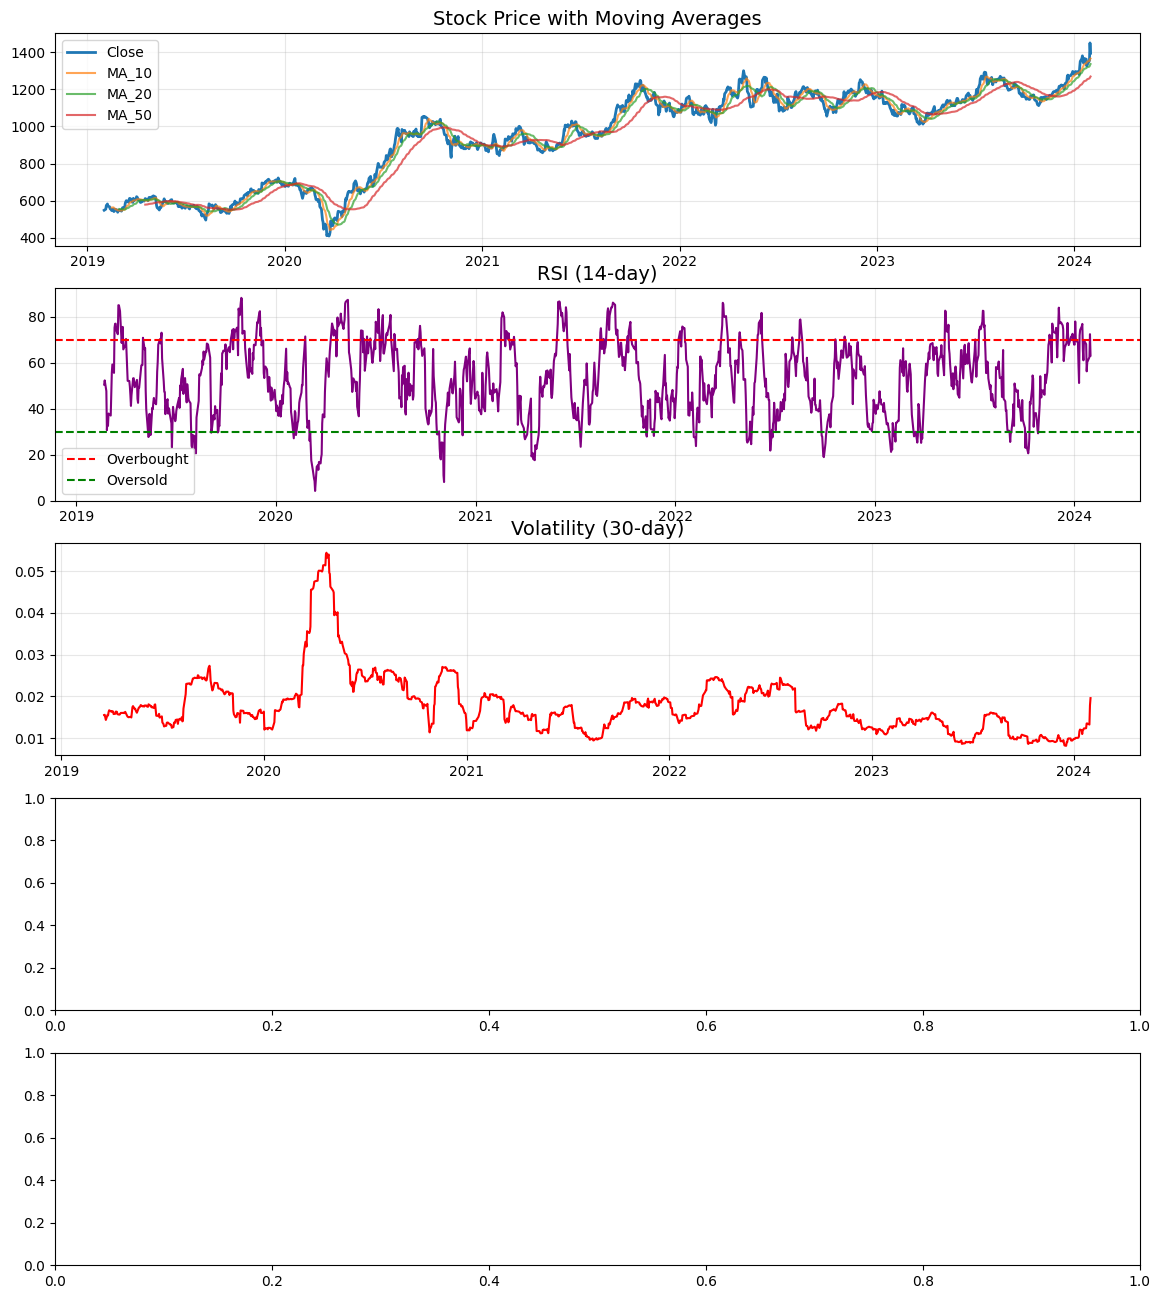

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(14, 16))

# 1. Price with MAs
axes[0].plot(data.index, data['Close'], label='Close', linewidth=2)
axes[0].plot(data.index, data['MA_10'], label='MA_10', alpha=0.7)
axes[0].plot(data.index, data['MA_20'], label='MA_20', alpha=0.7)
axes[0].plot(data.index, data['MA_50'], label='MA_50', alpha=0.7)
axes[0].set_title('Stock Price with Moving Averages', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. RSI
axes[1].plot(data.index, data['RSI'], color='purple')
axes[1].axhline(y=70, color='r', linestyle='--', label='Overbought')
axes[1].axhline(y=30, color='g', linestyle='--', label='Oversold')
axes[1].set_title('RSI (14-day)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Volatility
axes[2].plot(data.index, data['Volatility'], color='red')
axes[2].set_title('Volatility (30-day)', fontsize=14)
axes[2].grid(True, alpha=0.3)

# 4. Momentum
axes[3].plot(data.index, data['Momentum'], color='orange')
axes[3].axhline(y=0, color='black', linestyle='--')
axes[3].set_title('Momentum (10-day)', fontsize=14)
axes[3].grid(True, alpha=0.3)

# 5. Volume
axes[4].plot(data.index, data['Volume'], color='blue', alpha=0.5)
axes[4].set_title('Volume', fontsize=14)
axes[4].set_xlabel('Date')
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/all_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ All features visualized!")

In [9]:
# Complete feature calculation
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data
data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# RSI function
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate ALL features
data['Returns'] = data['Close'].pct_change()
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
data['RSI'] = calculate_rsi(data['Close'])
data['Volatility'] = data['Returns'].rolling(30).std()
data['Momentum'] = data['Close'] - data['Close'].shift(10)

print("All features calculated!")
print(data.columns.tolist())

[*********************100%***********************]  1 of 1 completed

All features calculated!
['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'MA_10', 'MA_20', 'MA_50', 'RSI', 'Volatility', 'Momentum']


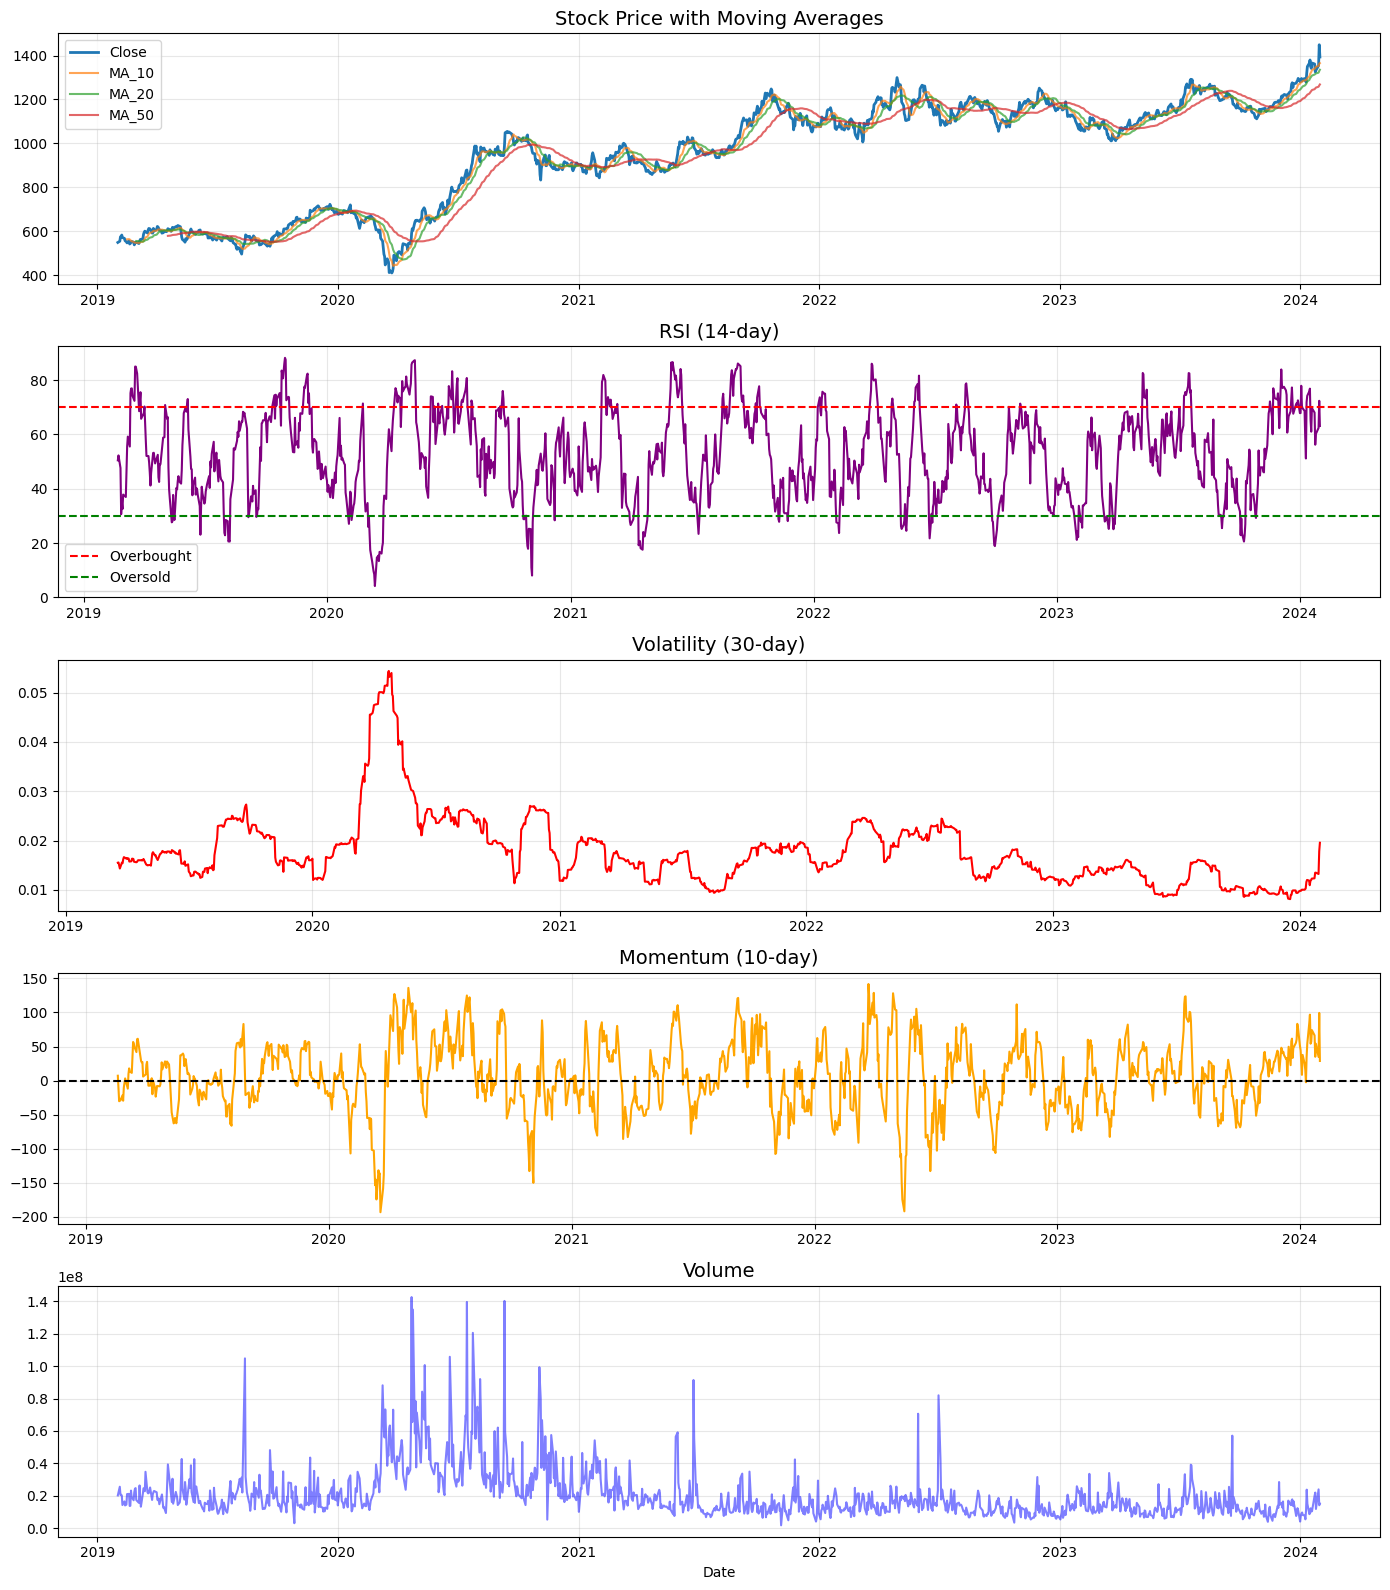

✓ All features visualized!


In [10]:
fig, axes = plt.subplots(5, 1, figsize=(14, 16))

# 1. Price with MAs
axes[0].plot(data.index, data['Close'], label='Close', linewidth=2)
axes[0].plot(data.index, data['MA_10'], label='MA_10', alpha=0.7)
axes[0].plot(data.index, data['MA_20'], label='MA_20', alpha=0.7)
axes[0].plot(data.index, data['MA_50'], label='MA_50', alpha=0.7)
axes[0].set_title('Stock Price with Moving Averages', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. RSI
axes[1].plot(data.index, data['RSI'], color='purple')
axes[1].axhline(y=70, color='r', linestyle='--', label='Overbought')
axes[1].axhline(y=30, color='g', linestyle='--', label='Oversold')
axes[1].set_title('RSI (14-day)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Volatility
axes[2].plot(data.index, data['Volatility'], color='red')
axes[2].set_title('Volatility (30-day)', fontsize=14)
axes[2].grid(True, alpha=0.3)

# 4. Momentum
axes[3].plot(data.index, data['Momentum'], color='orange')
axes[3].axhline(y=0, color='black', linestyle='--')
axes[3].set_title('Momentum (10-day)', fontsize=14)
axes[3].grid(True, alpha=0.3)

# 5. Volume
axes[4].plot(data.index, data['Volume'], color='blue', alpha=0.5)
axes[4].set_title('Volume', fontsize=14)
axes[4].set_xlabel('Date')
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/all_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ All features visualized!")